# Extracción de Datos

In [1]:
# Importamos las bibliotecas que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
temp_suncho = np.array([])
temp_compost = np.array([])
estados = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = "./measurements/28-06-2021_17-10-05"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,Temp_Compost,Temp_Suncho,Estado
0,28/06/2021_17:10:07,17.25,16.44,Prendido
1,28/06/2021_17:10:09,17.19,16.31,Prendido
2,28/06/2021_17:10:11,17.12,16.37,Prendido
3,28/06/2021_17:10:12,17.19,16.31,Prendido
4,28/06/2021_17:10:14,17.12,16.31,Prendido
...,...,...,...,...
95,28/06/2021_17:12:40,16.69,16.81,Prendido
96,28/06/2021_17:12:41,16.62,16.87,Prendido
97,28/06/2021_17:12:43,16.69,17.00,Prendido
98,28/06/2021_17:12:45,16.69,17.06,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

28/06/2021_17:10:07


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

558


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost = np.concatenate((temp_compost, np.transpose(df["Temp_Compost"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))

    # Estado
    for e in np.transpose(df["Estado"].to_numpy()):
        if e == "Prendido":
            estados = np.concatenate((estados, np.array([1])))
        else:
            estados = np.concatenate((estados, np.array([0])))

# Gráficos

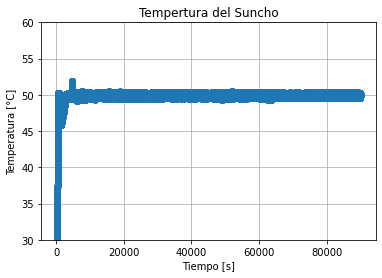

In [8]:
plt.figure("Temperatura del Suncho")
plt.title("Tempertura del Suncho")
plt.plot(tiempos, temp_suncho, "o")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.ylim([30, 60])
plt.savefig(f"{PATH}/figuras/Temperatura-del-Suncho.png")
plt.show()

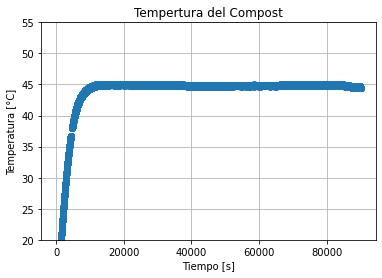

In [9]:
plt.figure("Temperatura del Compost")
plt.title("Tempertura del Compost")
plt.plot(tiempos, temp_compost, "o")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.ylim([20, 55])
plt.savefig(f"{PATH}/figuras/Temperatura-del-Compost.png")
plt.show()